## IS6 in Python: Linear Regression (Chapter 7)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 7: Linear Regression

In [48]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

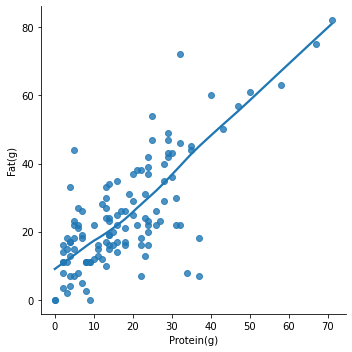

In [7]:
#Figure 7.1
burger = pd.read_csv("datasets/burger-king-items.txt", sep = "\t")
burger

sns.lmplot(data = burger, x = "Protein(g)", y = "Fat(g)", lowess = True)
plt.show()

#### Section 7.1: Least squares: The Line of "Best Fit"
See display on page 208

In [68]:
X = burger["Protein(g)"].to_numpy()
X = X.reshape(-1,1)
y = burger["Fat(g)"]

model = LinearRegression().fit(X, y)
print(f"model's prediction: {model.predict(np.array([[31]]))}")

model's prediction: [36.70931166]


Question: I don't know how extract the linear model out of the plot, and use it to calculate residual.

#### Section 7.2: The Linear Model

In [74]:
# Using scikit learn
print(f"model intercept: {model.intercept_}")
print(f"model coefficients: {model.coef_}")
print(f"model R-squared:", model.score(X,y))

model intercept: 8.402149367433001
model coefficients: [0.91313427]
model R-squared: 0.5742612717986757


In [71]:
# Using statsmodel
x = sm.add_constant(X)
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Fat(g)   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     161.9
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           5.34e-24
Time:                        14:21:55   Log-Likelihood:                -459.79
No. Observations:                 122   AIC:                             923.6
Df Residuals:                     120   BIC:                             929.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4021      1.604      5.238      0.0

Question:
1. There are 3 possible packages to get the job done (statsmodel, scipy, scikit learn). Which one should I use?

#### Example 7.1: A Linear Model for Hurricanes

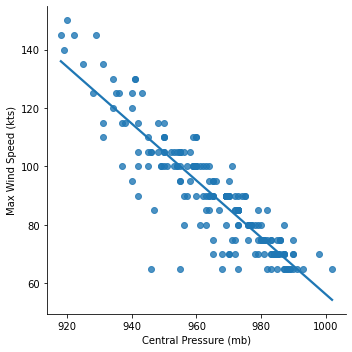

In [79]:
hurricanes = pd.read_csv("datasets/hurricanes_2018.txt", sep = "\t")
hurricanes

sns.lmplot(data = hurricanes, x = "Central.Pressure(mb)", y = "Max.Wind.Speed(kts)", ci = None)
plt.xlabel("Central Pressure (mb)")
plt.ylabel("Max Wind Speed (kts)")
plt.show()

#### Section 7.3: Finding the Least Squares Line

In [83]:
print(burger["Protein(g)"].describe())

count    122.000000
mean      17.934426
std       13.389115
min        0.000000
25%        7.000000
50%       15.500000
75%       24.750000
max       71.000000
Name: Protein(g), dtype: float64


#### Example 7.2: Finding the Regresison Equation

In [84]:
print(burger["Fat(g)"].describe())

count    122.000000
mean      24.778689
std       16.133617
min        0.000000
25%       14.250000
50%       22.000000
75%       33.000000
max       82.000000
Name: Fat(g), dtype: float64


In [86]:
sx = burger["Protein(g)"].std()
sx

13.389114676364041

In [87]:
sy = burger["Fat(g)"].std()
sy

16.133616818749825

In [94]:
r = burger.corr().iloc[3,4]
r

0.7578002849027409

In [95]:
r * sy / sx

0.9131342674466052

In [96]:
model.coef_

array([0.91313427])

#### Step-by-Step Example: Calculating a Regression Equation

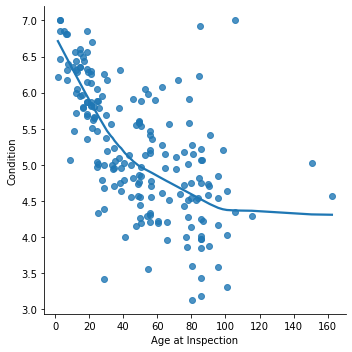

In [99]:
bridge = pd.read_csv("datasets/tompkins-county-bridges-2016.txt", sep = "\t")
bridge

sns.lmplot(data = bridge, x = "AgeAtInspection", y = "Condition", lowess = True)
plt.xlabel("Age at Inspection")
plt.ylabel("Condition")
plt.show()

See calculations on page 214
#### Section 7.4: Regression to the Mean
See Figure 7.4 on page 217 to visualize standard deviations
#### Section 7.5: Examining the Residuals

In [100]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Fat(g)   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     161.9
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           5.34e-24
Time:                        14:41:30   Log-Likelihood:                -459.79
No. Observations:                 122   AIC:                             923.6
Df Residuals:                     120   BIC:                             929.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4021      1.604      5.238      0.0

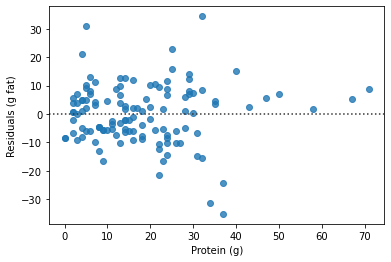

In [103]:
#Figure 7.5, page 219
sns.residplot(data = burger, x = "Protein(g)", y = "Fat(g)")
plt.xlabel("Protein (g)")
plt.ylabel("Residuals (g fat)")
plt.show()

In [105]:
#Figure 7.6, page 220


Question: How to plot a histogram of residuals?

#### Section 7.6: R$^2$ - The proportion of Variation Accounted for by the Model

In [109]:
print(res.rsquared)

0.5742612717986757


#### Section 7.7: Regression Assumptions and Conditions